<a href="https://colab.research.google.com/github/Jenarth/SCS3250-Group-2-Final-Project/blob/master/Rough%20Work/MS_Final_Dataset_8thApril.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from datetime import datetime
import calendar

go_data = pd.read_csv("https://github.com/Jenarth/SCS3250-Group-2-Final-Project/blob/master/GO%20Transit%20Data/Final%20GO%20Dataset.csv?raw=true", parse_dates=['Date'])
weather_data = pd.read_csv("https://github.com/Jenarth/SCS3250-Group-2-Final-Project/raw/master/Weather%20Data/Final%20Weather%20Data.csv", parse_dates=['Date/Time'])

In [31]:
monthly_mean = weather_data.groupby(by="year_month")['Mean Temp (°C)','Total Precip (mm)'].mean()
monthly_mean = monthly_mean.rename(columns={'Mean Temp (°C)':'Monthly Mean Temp (°C)', 'Total Precip (mm)':'Monthly Mean Precip (mm)'})
weather_data = pd.merge(weather_data, monthly_mean, how='left', left_on='year_month', right_on='year_month')
weather_data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Date/Time,Year,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Total Precip (mm),Snow on Grnd (cm),year_month,Monthly Mean Temp (°C),Monthly Mean Precip (mm)
0,2017-03-01,2017,3,1,13.1,-1.9,5.6,18.4,0.0,2017-03,0.116129,2.490323
1,2017-03-02,2017,3,2,-1.3,-6.4,-3.9,0.2,0.5,2017-03,0.116129,2.490323
2,2017-03-03,2017,3,3,-4.3,-8.1,-6.2,0.0,0.5,2017-03,0.116129,2.490323
3,2017-03-04,2017,3,4,-6.5,-11.9,-9.2,0.2,0.5,2017-03,0.116129,2.490323
4,2017-03-05,2017,3,5,-0.4,-10.6,-5.5,0.0,0.5,2017-03,0.116129,2.490323
...,...,...,...,...,...,...,...,...,...,...,...,...
1092,2020-02-26,2020,2,26,4.1,-3.2,0.4,11.8,0.0,2020-02,-1.906897,2.137931
1093,2020-02-27,2020,2,27,-2.7,-5.3,-4.0,3.1,0.0,2020-02,-1.906897,2.137931
1094,2020-02-28,2020,2,28,-2.5,-9.4,-5.9,1.1,0.0,2020-02,-1.906897,2.137931
1095,2020-02-29,2020,2,29,-3.2,-12.8,-8.0,1.2,0.0,2020-02,-1.906897,2.137931


In [32]:
weather_data['Weekday'] = weather_data.apply(lambda row: calendar.day_name[datetime.weekday(row['Date/Time'])], axis = 1)
weather_data

,Date/Time,Year,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Total Precip (mm),Snow on Grnd (cm),year_month,Monthly Mean Temp (°C),Monthly Mean Precip (mm),Weekday
0,2017-03-01,2017,3,1,13.1,-1.9,5.6,18.4,0.0,2017-03,0.116129,2.490323,Wednesday
1,2017-03-02,2017,3,2,-1.3,-6.4,-3.9,0.2,0.5,2017-03,0.116129,2.490323,Thursday
2,2017-03-03,2017,3,3,-4.3,-8.1,-6.2,0.0,0.5,2017-03,0.116129,2.490323,Friday
3,2017-03-04,2017,3,4,-6.5,-11.9,-9.2,0.2,0.5,2017-03,0.116129,2.490323,Saturday
4,2017-03-05,2017,3,5,-0.4,-10.6,-5.5,0.0,0.5,2017-03,0.116129,2.490323,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,2020-02-26,2020,2,26,4.1,-3.2,0.4,11.8,0.0,2020-02,-1.906897,2.137931,Wednesday
1093,2020-02-27,2020,2,27,-2.7,-5.3,-4.0,3.1,0.0,2020-02,-1.906897,2.137931,Thursday
1094,2020-02-28,2020,2,28,-2.5,-9.4,-5.9,1.1,0.0,2020-02,-1.906897,2.137931,Friday
1095,2020-02-29,2020,2,29,-3.2,-12.8,-8.0,1.2,0.0,2020-02,-1.906897,2.137931,Saturday


In [33]:
weather_data['Delta Temp (°C)'] = weather_data.apply(lambda row: row["Mean Temp (°C)"] - row["Monthly Mean Temp (°C)"], axis=1)
weather_data['Delta Percip (mm)'] = weather_data.apply(lambda row: row["Total Precip (mm)"] - row["Monthly Mean Precip (mm)"], axis=1)
weather_data

,Date/Time,Year,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Total Precip (mm),Snow on Grnd (cm),year_month,Monthly Mean Temp (°C),Monthly Mean Precip (mm),Weekday,Delta Temp (°C),Delta Percip (mm)
0,2017-03-01,2017,3,1,13.1,-1.9,5.6,18.4,0.0,2017-03,0.116129,2.490323,Wednesday,5.483871,15.909677
1,2017-03-02,2017,3,2,-1.3,-6.4,-3.9,0.2,0.5,2017-03,0.116129,2.490323,Thursday,-4.016129,-2.290323
2,2017-03-03,2017,3,3,-4.3,-8.1,-6.2,0.0,0.5,2017-03,0.116129,2.490323,Friday,-6.316129,-2.490323
3,2017-03-04,2017,3,4,-6.5,-11.9,-9.2,0.2,0.5,2017-03,0.116129,2.490323,Saturday,-9.316129,-2.290323
4,2017-03-05,2017,3,5,-0.4,-10.6,-5.5,0.0,0.5,2017-03,0.116129,2.490323,Sunday,-5.616129,-2.490323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,2020-02-26,2020,2,26,4.1,-3.2,0.4,11.8,0.0,2020-02,-1.906897,2.137931,Wednesday,2.306897,9.662069
1093,2020-02-27,2020,2,27,-2.7,-5.3,-4.0,3.1,0.0,2020-02,-1.906897,2.137931,Thursday,-2.093103,0.962069
1094,2020-02-28,2020,2,28,-2.5,-9.4,-5.9,1.1,0.0,2020-02,-1.906897,2.137931,Friday,-3.993103,-1.037931
1095,2020-02-29,2020,2,29,-3.2,-12.8,-8.0,1.2,0.0,2020-02,-1.906897,2.137931,Saturday,-6.093103,-0.937931


In [34]:
go_data

,Date,line_id,line_name,station_name,daily_total
0,2017-03-01,3,Kitchener,Acton GO,94
1,2017-03-02,3,Kitchener,Acton GO,76
2,2017-03-03,3,Kitchener,Acton GO,73
3,2017-03-04,3,Kitchener,Acton GO,0
4,2017-03-05,3,Kitchener,Acton GO,0
...,...,...,...,...,...
69089,2020-02-24,4,Barrie,York University GO,275
69090,2020-02-25,4,Barrie,York University GO,287
69091,2020-02-26,4,Barrie,York University GO,269
69092,2020-02-27,4,Barrie,York University GO,264


In [35]:
go_pivot = go_data.groupby(['line_name','Date'])['daily_total'].sum().to_frame()
go_pivot.reset_index(inplace=True)
go_pivot = go_pivot.pivot(index='Date', columns='line_name', values='daily_total')
go_pivot.fillna(value=0, inplace=True)
go_pivot

line_name,Barrie,Kitchener,Lakeshore East,Lakeshore West,Milton,Richmond Hill,Stouffville,Union Station
Date,,,,,,,,
2017-03-01,10022.0,13585.0,25273.0,32909.0,15599.0,5639.0,8804.0,95802.0
2017-03-02,9932.0,13331.0,26120.0,33884.0,15653.0,5665.0,8736.0,95873.0
2017-03-03,8905.0,12235.0,23801.0,31473.0,14092.0,5129.0,7918.0,87200.0
2017-03-04,928.0,480.0,7872.0,11756.0,208.0,0.0,246.0,13899.0
2017-03-05,803.0,398.0,4714.0,8381.0,169.0,0.0,156.0,8505.0
...,...,...,...,...,...,...,...,...
2020-02-25,13650.0,15097.0,29727.0,36973.0,17192.0,6865.0,10485.0,99431.0
2020-02-26,12596.0,13557.0,26690.0,33732.0,14331.0,6215.0,9749.0,98193.0
2020-02-27,11349.0,13074.0,26818.0,34180.0,15281.0,5522.0,9151.0,94998.0


In [36]:
dataset = pd.merge(go_pivot, weather_data, how='left', left_on="Date", right_on="Date/Time")
dataset = dataset.rename(columns={'Date/Time':'Date', 'Barrie':'Barrie Ridership', 'Kitchener':'Kitchener Ridership', 'Lakeshore East':'Lakeshore East Ridership', 'Lakeshore West':'Lakeshore West Ridership', 'Milton': 'Milton Ridership', 'Richmond Hill':'Richmond Hill Ridership', 'Stouffville':'Stouffville Ridership', 'Union Station':'Union Station Ridership'})
dataset = dataset[['Date', 'Year', 'Month', 'year_month', 'Day', 'Weekday', 'Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)', 'Monthly Mean Temp (°C)', 'Delta Temp (°C)', 'Total Precip (mm)', 'Monthly Mean Precip (mm)' , 'Delta Percip (mm)', 'Snow on Grnd (cm)', 'Barrie Ridership', 'Kitchener Ridership', 'Lakeshore East Ridership', 'Lakeshore West Ridership', 'Milton Ridership', 'Richmond Hill Ridership', 'Stouffville Ridership', 'Union Station Ridership']]
dataset

,Date,Year,Month,year_month,Day,Weekday,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Monthly Mean Temp (°C),Delta Temp (°C),Total Precip (mm),Monthly Mean Precip (mm),Delta Percip (mm),Snow on Grnd (cm),Barrie Ridership,Kitchener Ridership,Lakeshore East Ridership,Lakeshore West Ridership,Milton Ridership,Richmond Hill Ridership,Stouffville Ridership,Union Station Ridership
0,2017-03-01,2017,3,2017-03,1,Wednesday,13.1,-1.9,5.6,0.116129,5.483871,18.4,2.490323,15.909677,0.0,10022.0,13585.0,25273.0,32909.0,15599.0,5639.0,8804.0,95802.0
1,2017-03-02,2017,3,2017-03,2,Thursday,-1.3,-6.4,-3.9,0.116129,-4.016129,0.2,2.490323,-2.290323,0.5,9932.0,13331.0,26120.0,33884.0,15653.0,5665.0,8736.0,95873.0
2,2017-03-03,2017,3,2017-03,3,Friday,-4.3,-8.1,-6.2,0.116129,-6.316129,0.0,2.490323,-2.490323,0.5,8905.0,12235.0,23801.0,31473.0,14092.0,5129.0,7918.0,87200.0
3,2017-03-04,2017,3,2017-03,4,Saturday,-6.5,-11.9,-9.2,0.116129,-9.316129,0.2,2.490323,-2.290323,0.5,928.0,480.0,7872.0,11756.0,208.0,0.0,246.0,13899.0
4,2017-03-05,2017,3,2017-03,5,Sunday,-0.4,-10.6,-5.5,0.116129,-5.616129,0.0,2.490323,-2.490323,0.5,803.0,398.0,4714.0,8381.0,169.0,0.0,156.0,8505.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,2020-02-25,2020,2,2020-02,25,Tuesday,5.6,1.7,3.7,-1.906897,5.606897,0.2,2.137931,-1.937931,0.0,13650.0,15097.0,29727.0,36973.0,17192.0,6865.0,10485.0,99431.0
1092,2020-02-26,2020,2,2020-02,26,Wednesday,4.1,-3.2,0.4,-1.906897,2.306897,11.8,2.137931,9.662069,0.0,12596.0,13557.0,26690.0,33732.0,14331.0,6215.0,9749.0,98193.0
1093,2020-02-27,2020,2,2020-02,27,Thursday,-2.7,-5.3,-4.0,-1.906897,-2.093103,3.1,2.137931,0.962069,0.0,11349.0,13074.0,26818.0,34180.0,15281.0,5522.0,9151.0,94998.0
1094,2020-02-28,2020,2,2020-02,28,Friday,-2.5,-9.4,-5.9,-1.906897,-3.993103,1.1,2.137931,-1.037931,0.0,11098.0,13008.0,27785.0,34263.0,14426.0,5629.0,8759.0,95108.0


Text(0, 0.5, 'Frequency')

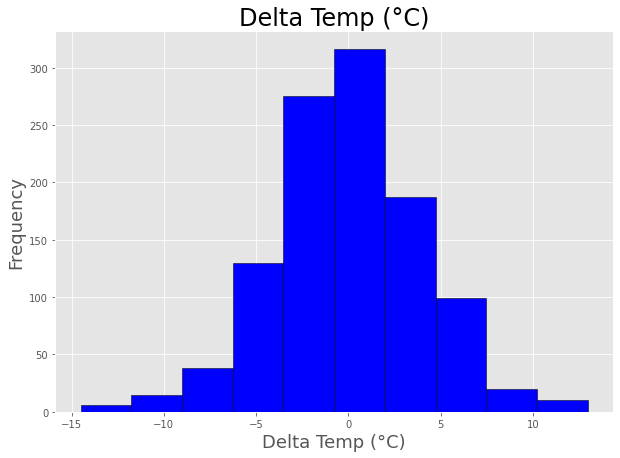

In [37]:
dataset = dataset.set_index("Date")
import matplotlib.pyplot as plt
plt.style.use('ggplot')

dataset["Delta Temp (°C)"].plot(kind='hist', color='blue', edgecolor='black', figsize=(10,7))
plt.title('Delta Temp (°C)', size=24)
plt.xlabel('Delta Temp (°C)', size=18)
plt.ylabel('Frequency', size=18)

Text(0, 0.5, 'Frequency')

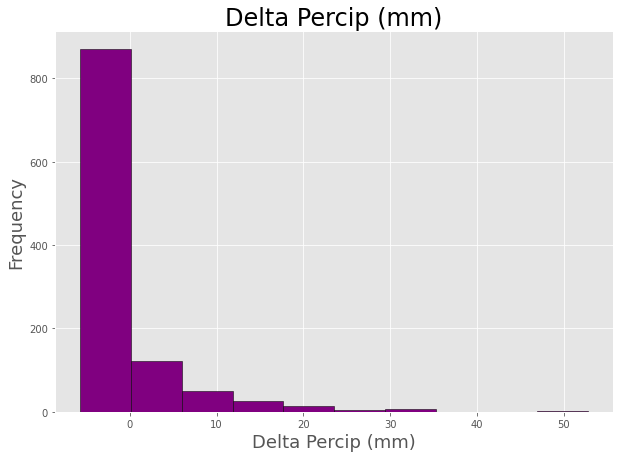

In [38]:
dataset["Delta Percip (mm)"].plot(kind='hist', color='purple', edgecolor='black', figsize=(10,7))
plt.title('Delta Percip (mm)', size=24)
plt.xlabel('Delta Percip (mm)', size=18)
plt.ylabel('Frequency', size=18)

In [39]:
dataset["Delta Temp (°C)"].min()
#range 0f -14 to 12, can split into ranges = -15 to -5, -5 to 0, 0 to 5, 5 to 15
dataset["Delta Percip (mm)"].max()
#range of -5 to 52
temp_bins = [-15,-5,0,5,15]
temp_labels = ['-15 to -5', '-5 to 0', '0 to 5', '5 to 15']
dataset['Delta Temp Range'] = pd.cut(dataset['Delta Temp (°C)'], bins=temp_bins, labels=temp_labels)

dataset

,Year,Month,year_month,Day,Weekday,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Monthly Mean Temp (°C),Delta Temp (°C),Total Precip (mm),Monthly Mean Precip (mm),Delta Percip (mm),Snow on Grnd (cm),Barrie Ridership,Kitchener Ridership,Lakeshore East Ridership,Lakeshore West Ridership,Milton Ridership,Richmond Hill Ridership,Stouffville Ridership,Union Station Ridership,Delta Temp Range
Date,,,,,,,,,,,,,,,,,,,,,,,
2017-03-01,2017,3,2017-03,1,Wednesday,13.1,-1.9,5.6,0.116129,5.483871,18.4,2.490323,15.909677,0.0,10022.0,13585.0,25273.0,32909.0,15599.0,5639.0,8804.0,95802.0,5 to 15
2017-03-02,2017,3,2017-03,2,Thursday,-1.3,-6.4,-3.9,0.116129,-4.016129,0.2,2.490323,-2.290323,0.5,9932.0,13331.0,26120.0,33884.0,15653.0,5665.0,8736.0,95873.0,-5 to 0
2017-03-03,2017,3,2017-03,3,Friday,-4.3,-8.1,-6.2,0.116129,-6.316129,0.0,2.490323,-2.490323,0.5,8905.0,12235.0,23801.0,31473.0,14092.0,5129.0,7918.0,87200.0,-15 to -5
2017-03-04,2017,3,2017-03,4,Saturday,-6.5,-11.9,-9.2,0.116129,-9.316129,0.2,2.490323,-2.290323,0.5,928.0,480.0,7872.0,11756.0,208.0,0.0,246.0,13899.0,-15 to -5
2017-03-05,2017,3,2017-03,5,Sunday,-0.4,-10.6,-5.5,0.116129,-5.616129,0.0,2.490323,-2.490323,0.5,803.0,398.0,4714.0,8381.0,169.0,0.0,156.0,8505.0,-15 to -5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-25,2020,2,2020-02,25,Tuesday,5.6,1.7,3.7,-1.906897,5.606897,0.2,2.137931,-1.937931,0.0,13650.0,15097.0,29727.0,36973.0,17192.0,6865.0,10485.0,99431.0,5 to 15
2020-02-26,2020,2,2020-02,26,Wednesday,4.1,-3.2,0.4,-1.906897,2.306897,11.8,2.137931,9.662069,0.0,12596.0,13557.0,26690.0,33732.0,14331.0,6215.0,9749.0,98193.0,0 to 5
2020-02-27,2020,2,2020-02,27,Thursday,-2.7,-5.3,-4.0,-1.906897,-2.093103,3.1,2.137931,0.962069,0.0,11349.0,13074.0,26818.0,34180.0,15281.0,5522.0,9151.0,94998.0,-5 to 0


In [40]:
prec_bins = [-10,0,10,50]
prec_labels = ['-10 to 0','0 to 10','10 to 50']
dataset['Delta Percip Range'] = pd.cut(dataset['Delta Percip (mm)'], bins=prec_bins, labels=prec_labels)

dataset


,Year,Month,year_month,Day,Weekday,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Monthly Mean Temp (°C),Delta Temp (°C),Total Precip (mm),Monthly Mean Precip (mm),Delta Percip (mm),Snow on Grnd (cm),Barrie Ridership,Kitchener Ridership,Lakeshore East Ridership,Lakeshore West Ridership,Milton Ridership,Richmond Hill Ridership,Stouffville Ridership,Union Station Ridership,Delta Temp Range,Delta Percip Range
Date,,,,,,,,,,,,,,,,,,,,,,,,
2017-03-01,2017,3,2017-03,1,Wednesday,13.1,-1.9,5.6,0.116129,5.483871,18.4,2.490323,15.909677,0.0,10022.0,13585.0,25273.0,32909.0,15599.0,5639.0,8804.0,95802.0,5 to 15,10 to 50
2017-03-02,2017,3,2017-03,2,Thursday,-1.3,-6.4,-3.9,0.116129,-4.016129,0.2,2.490323,-2.290323,0.5,9932.0,13331.0,26120.0,33884.0,15653.0,5665.0,8736.0,95873.0,-5 to 0,-10 to 0
2017-03-03,2017,3,2017-03,3,Friday,-4.3,-8.1,-6.2,0.116129,-6.316129,0.0,2.490323,-2.490323,0.5,8905.0,12235.0,23801.0,31473.0,14092.0,5129.0,7918.0,87200.0,-15 to -5,-10 to 0
2017-03-04,2017,3,2017-03,4,Saturday,-6.5,-11.9,-9.2,0.116129,-9.316129,0.2,2.490323,-2.290323,0.5,928.0,480.0,7872.0,11756.0,208.0,0.0,246.0,13899.0,-15 to -5,-10 to 0
2017-03-05,2017,3,2017-03,5,Sunday,-0.4,-10.6,-5.5,0.116129,-5.616129,0.0,2.490323,-2.490323,0.5,803.0,398.0,4714.0,8381.0,169.0,0.0,156.0,8505.0,-15 to -5,-10 to 0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-25,2020,2,2020-02,25,Tuesday,5.6,1.7,3.7,-1.906897,5.606897,0.2,2.137931,-1.937931,0.0,13650.0,15097.0,29727.0,36973.0,17192.0,6865.0,10485.0,99431.0,5 to 15,-10 to 0
2020-02-26,2020,2,2020-02,26,Wednesday,4.1,-3.2,0.4,-1.906897,2.306897,11.8,2.137931,9.662069,0.0,12596.0,13557.0,26690.0,33732.0,14331.0,6215.0,9749.0,98193.0,0 to 5,0 to 10
2020-02-27,2020,2,2020-02,27,Thursday,-2.7,-5.3,-4.0,-1.906897,-2.093103,3.1,2.137931,0.962069,0.0,11349.0,13074.0,26818.0,34180.0,15281.0,5522.0,9151.0,94998.0,-5 to 0,0 to 10


In [41]:
def CategorizeByTempRange(x):
    if x['Delta Temp Range']=='-15 to -5':
      val = "Unseasonably Cold"
    elif x['Delta Temp Range']=='-5 to 0':
      val = "Cold"
    elif x['Delta Temp Range']=='0 to 5':
      val = "Warm"
    elif x['Delta Temp Range']=='5 to 15':
      val = "Unseasonably Warm"
    else:
      val = "None"
    return val


dataset["Temp Category"] = dataset.apply(CategorizeByTempRange, axis = 1)

dataset

,Year,Month,year_month,Day,Weekday,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Monthly Mean Temp (°C),Delta Temp (°C),Total Precip (mm),Monthly Mean Precip (mm),Delta Percip (mm),Snow on Grnd (cm),Barrie Ridership,Kitchener Ridership,Lakeshore East Ridership,Lakeshore West Ridership,Milton Ridership,Richmond Hill Ridership,Stouffville Ridership,Union Station Ridership,Delta Temp Range,Delta Percip Range,Temp Category
Date,,,,,,,,,,,,,,,,,,,,,,,,,
2017-03-01,2017,3,2017-03,1,Wednesday,13.1,-1.9,5.6,0.116129,5.483871,18.4,2.490323,15.909677,0.0,10022.0,13585.0,25273.0,32909.0,15599.0,5639.0,8804.0,95802.0,5 to 15,10 to 50,Unseasonably Warm
2017-03-02,2017,3,2017-03,2,Thursday,-1.3,-6.4,-3.9,0.116129,-4.016129,0.2,2.490323,-2.290323,0.5,9932.0,13331.0,26120.0,33884.0,15653.0,5665.0,8736.0,95873.0,-5 to 0,-10 to 0,Cold
2017-03-03,2017,3,2017-03,3,Friday,-4.3,-8.1,-6.2,0.116129,-6.316129,0.0,2.490323,-2.490323,0.5,8905.0,12235.0,23801.0,31473.0,14092.0,5129.0,7918.0,87200.0,-15 to -5,-10 to 0,Unseasonably Cold
2017-03-04,2017,3,2017-03,4,Saturday,-6.5,-11.9,-9.2,0.116129,-9.316129,0.2,2.490323,-2.290323,0.5,928.0,480.0,7872.0,11756.0,208.0,0.0,246.0,13899.0,-15 to -5,-10 to 0,Unseasonably Cold
2017-03-05,2017,3,2017-03,5,Sunday,-0.4,-10.6,-5.5,0.116129,-5.616129,0.0,2.490323,-2.490323,0.5,803.0,398.0,4714.0,8381.0,169.0,0.0,156.0,8505.0,-15 to -5,-10 to 0,Unseasonably Cold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-25,2020,2,2020-02,25,Tuesday,5.6,1.7,3.7,-1.906897,5.606897,0.2,2.137931,-1.937931,0.0,13650.0,15097.0,29727.0,36973.0,17192.0,6865.0,10485.0,99431.0,5 to 15,-10 to 0,Unseasonably Warm
2020-02-26,2020,2,2020-02,26,Wednesday,4.1,-3.2,0.4,-1.906897,2.306897,11.8,2.137931,9.662069,0.0,12596.0,13557.0,26690.0,33732.0,14331.0,6215.0,9749.0,98193.0,0 to 5,0 to 10,Warm
2020-02-27,2020,2,2020-02,27,Thursday,-2.7,-5.3,-4.0,-1.906897,-2.093103,3.1,2.137931,0.962069,0.0,11349.0,13074.0,26818.0,34180.0,15281.0,5522.0,9151.0,94998.0,-5 to 0,0 to 10,Cold


In [42]:
def CategorizeByPrecRange(x):
    if x['Delta Percip Range']=='-10 to 0':
      val = "Less Rain"
    elif x['Delta Percip Range']=='0 to 10':
      val = "Some Rain"
    elif x['Delta Percip Range']=='10 to 50':
      val = "More Rain" 
    else:
      val = "None"
    return val

dataset["Prec Category"] = dataset.apply(CategorizeByPrecRange, axis = 1)

dataset

,Year,Month,year_month,Day,Weekday,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Monthly Mean Temp (°C),Delta Temp (°C),Total Precip (mm),Monthly Mean Precip (mm),Delta Percip (mm),Snow on Grnd (cm),Barrie Ridership,Kitchener Ridership,Lakeshore East Ridership,Lakeshore West Ridership,Milton Ridership,Richmond Hill Ridership,Stouffville Ridership,Union Station Ridership,Delta Temp Range,Delta Percip Range,Temp Category,Prec Category
Date,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-03-01,2017,3,2017-03,1,Wednesday,13.1,-1.9,5.6,0.116129,5.483871,18.4,2.490323,15.909677,0.0,10022.0,13585.0,25273.0,32909.0,15599.0,5639.0,8804.0,95802.0,5 to 15,10 to 50,Unseasonably Warm,More Rain
2017-03-02,2017,3,2017-03,2,Thursday,-1.3,-6.4,-3.9,0.116129,-4.016129,0.2,2.490323,-2.290323,0.5,9932.0,13331.0,26120.0,33884.0,15653.0,5665.0,8736.0,95873.0,-5 to 0,-10 to 0,Cold,Less Rain
2017-03-03,2017,3,2017-03,3,Friday,-4.3,-8.1,-6.2,0.116129,-6.316129,0.0,2.490323,-2.490323,0.5,8905.0,12235.0,23801.0,31473.0,14092.0,5129.0,7918.0,87200.0,-15 to -5,-10 to 0,Unseasonably Cold,Less Rain
2017-03-04,2017,3,2017-03,4,Saturday,-6.5,-11.9,-9.2,0.116129,-9.316129,0.2,2.490323,-2.290323,0.5,928.0,480.0,7872.0,11756.0,208.0,0.0,246.0,13899.0,-15 to -5,-10 to 0,Unseasonably Cold,Less Rain
2017-03-05,2017,3,2017-03,5,Sunday,-0.4,-10.6,-5.5,0.116129,-5.616129,0.0,2.490323,-2.490323,0.5,803.0,398.0,4714.0,8381.0,169.0,0.0,156.0,8505.0,-15 to -5,-10 to 0,Unseasonably Cold,Less Rain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-25,2020,2,2020-02,25,Tuesday,5.6,1.7,3.7,-1.906897,5.606897,0.2,2.137931,-1.937931,0.0,13650.0,15097.0,29727.0,36973.0,17192.0,6865.0,10485.0,99431.0,5 to 15,-10 to 0,Unseasonably Warm,Less Rain
2020-02-26,2020,2,2020-02,26,Wednesday,4.1,-3.2,0.4,-1.906897,2.306897,11.8,2.137931,9.662069,0.0,12596.0,13557.0,26690.0,33732.0,14331.0,6215.0,9749.0,98193.0,0 to 5,0 to 10,Warm,Some Rain
2020-02-27,2020,2,2020-02,27,Thursday,-2.7,-5.3,-4.0,-1.906897,-2.093103,3.1,2.137931,0.962069,0.0,11349.0,13074.0,26818.0,34180.0,15281.0,5522.0,9151.0,94998.0,-5 to 0,0 to 10,Cold,Some Rain


Delta Temp Range
-15 to -5     782846.0
-5 to 0      3637563.0
0 to 5       3545033.0
5 to 15      1016720.0
Name: Barrie Ridership, dtype: float64

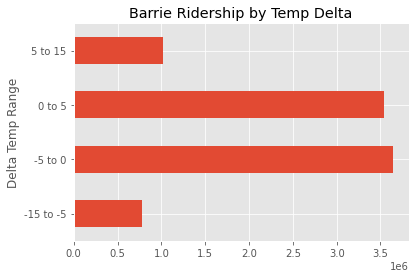

In [43]:
Temp_Total = dataset.groupby(['Delta Temp Range'])["Barrie Ridership"].sum()
Temp_Total.plot.barh(title = "Barrie Ridership by Temp Delta")
Temp_Total


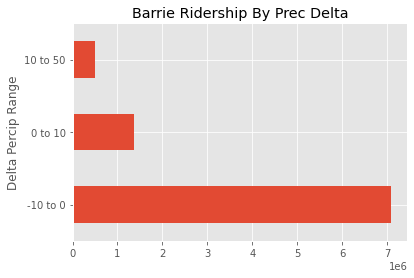

In [44]:
Prec_Total = dataset.groupby(['Delta Percip Range'])["Barrie Ridership"].sum()
Prec_Total.plot.barh(title = "Barrie Ridership By Prec Delta")

In [45]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1096 entries, 2017-03-01 to 2020-02-29
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Year                      1096 non-null   int64   
 1   Month                     1096 non-null   int64   
 2   year_month                1096 non-null   object  
 3   Day                       1096 non-null   int64   
 4   Weekday                   1096 non-null   object  
 5   Max Temp (°C)             1096 non-null   float64 
 6   Min Temp (°C)             1096 non-null   float64 
 7   Mean Temp (°C)            1096 non-null   float64 
 8   Monthly Mean Temp (°C)    1096 non-null   float64 
 9   Delta Temp (°C)           1096 non-null   float64 
 10  Total Precip (mm)         1096 non-null   float64 
 11  Monthly Mean Precip (mm)  1096 non-null   float64 
 12  Delta Percip (mm)         1096 non-null   float64 
 13  Snow on Grnd (cm)         1096

In [0]:
dataset.to_csv("Final Dataset.csv")